In [55]:
import numpy as np
import astropy
import h5py
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.visualization import time_support
import matplotlib.patches as patches
import batman

In [3]:
# ## TRIAL 1
# with h5py.File('S3_2024-06-11_lhs1140c_run13/ap5_bg12_30/S3_lhs1140c_ap5_bg12_30_FluxData_seg0000.h5', 'r') as file:
#     print("Keys: %s" % file.keys())
#     a_group_key = list(file.keys())[0]
     
#     # Getting the data
#     #flux = list(file[list(file.keys())[9]])
#     time0 = list(file[list(file.keys())[17]])
#     skylev = np.array(file['skylev'])
#     skyer = np.array(file['skyerr'])
#     aplev0 = np.array(file['aplev'])
#     aperr0 = np.array(file['aperr'])

# with h5py.File('S3_2024-06-11_lhs1140c_run13/ap5_bg12_30/S3_lhs1140c_ap5_bg12_30_FluxData_seg0001.h5', 'r') as file:
#     # Getting the data
#     time1 = np.array(file['time'])
#     aplev1 = np.array(file['aplev'])
#     aperr1 = np.array(file['aperr'])
    
# with h5py.File('S3_2024-06-11_lhs1140c_run13/ap5_bg12_30/S3_lhs1140c_ap5_bg12_30_FluxData_seg0002.h5', 'r') as file:
#     # Getting the data
#     time2 = np.array(file['time'])
#     aplev2 = np.array(file['aplev'])
#     aperr2 = np.array(file['aperr'])

# with h5py.File('S3_2024-06-11_lhs1140c_run13/ap5_bg12_30/S3_lhs1140c_ap5_bg12_30_FluxData_seg0003.h5', 'r') as file:
#     # Getting the data
#     time3 = np.array(file['time'])
#     aplev3 = np.array(file['aplev'])
#     aperr3 = np.array(file['aperr'])
    
# with h5py.File('S3_2024-06-11_lhs1140c_run13/ap5_bg12_30/S3_lhs1140c_ap5_bg12_30_FluxData_seg0004.h5', 'r') as file:
#     # Getting the data
#     time4 = np.array(file['time'])
#     aplev4 = np.array(file['aplev'])
#     aperr4 = np.array(file['aperr'])

In [3]:
## TRIAL 2
with h5py.File('S3_trial1_ap7_bg12_42/S3_lhs1140c_ap7_bg12_42_FluxData_seg0000.h5', 'r') as file:     
    # Getting the data
    time0 = list(file[list(file.keys())[17]])
    aplev0 = np.array(file['aplev'])
    aperr0 = np.array(file['aperr'])

with h5py.File('S3_trial1_ap7_bg12_42/S3_lhs1140c_ap7_bg12_42_FluxData_seg0001.h5', 'r') as file:
    # Getting the data
    time1 = np.array(file['time'])
    aplev1 = np.array(file['aplev'])
    aperr1 = np.array(file['aperr'])
    
with h5py.File('S3_trial1_ap7_bg12_42/S3_lhs1140c_ap7_bg12_42_FluxData_seg0002.h5', 'r') as file:
    # Getting the data
    time2 = np.array(file['time'])
    aplev2 = np.array(file['aplev'])
    aperr2 = np.array(file['aperr'])

with h5py.File('S3_trial1_ap7_bg12_42/S3_lhs1140c_ap7_bg12_42_FluxData_seg0003.h5', 'r') as file:
    # Getting the data
    time3 = np.array(file['time'])
    aplev3 = np.array(file['aplev'])
    aperr3 = np.array(file['aperr'])
    
with h5py.File('S3_trial1_ap7_bg12_42/S3_lhs1140c_ap7_bg12_42_FluxData_seg0004.h5', 'r') as file:
    # Getting the data
    time4 = np.array(file['time'])
    aplev4 = np.array(file['aplev'])
    aperr4 = np.array(file['aperr'])


In [4]:
# Assemble the segments into one array
time = np.concatenate((time0,time1, time2, time3, time4), axis = 0)
aplev = np.concatenate((aplev0,aplev1, aplev2, aplev3, aplev4), axis = 0)
aperr = np.concatenate((aperr0,aperr1, aperr2, aperr3, aperr4), axis = 0)

<ErrorbarContainer object of 3 artists>

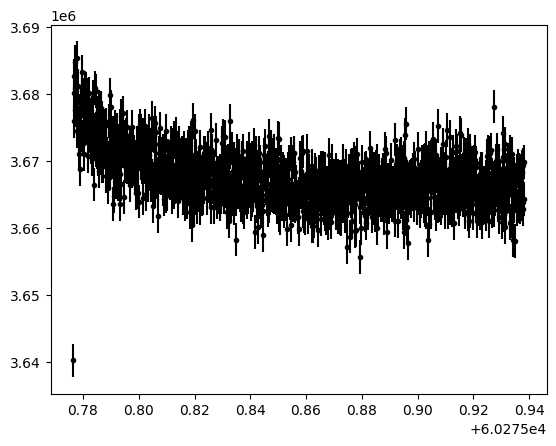

In [7]:
plt.Figure()
plt.errorbar(time, aplev, yerr=aperr, c='k', fmt='.')
# plt.Figure()
# plt.errorbar(time, skylev, yerr=skyerr, c='k', fmt='.')

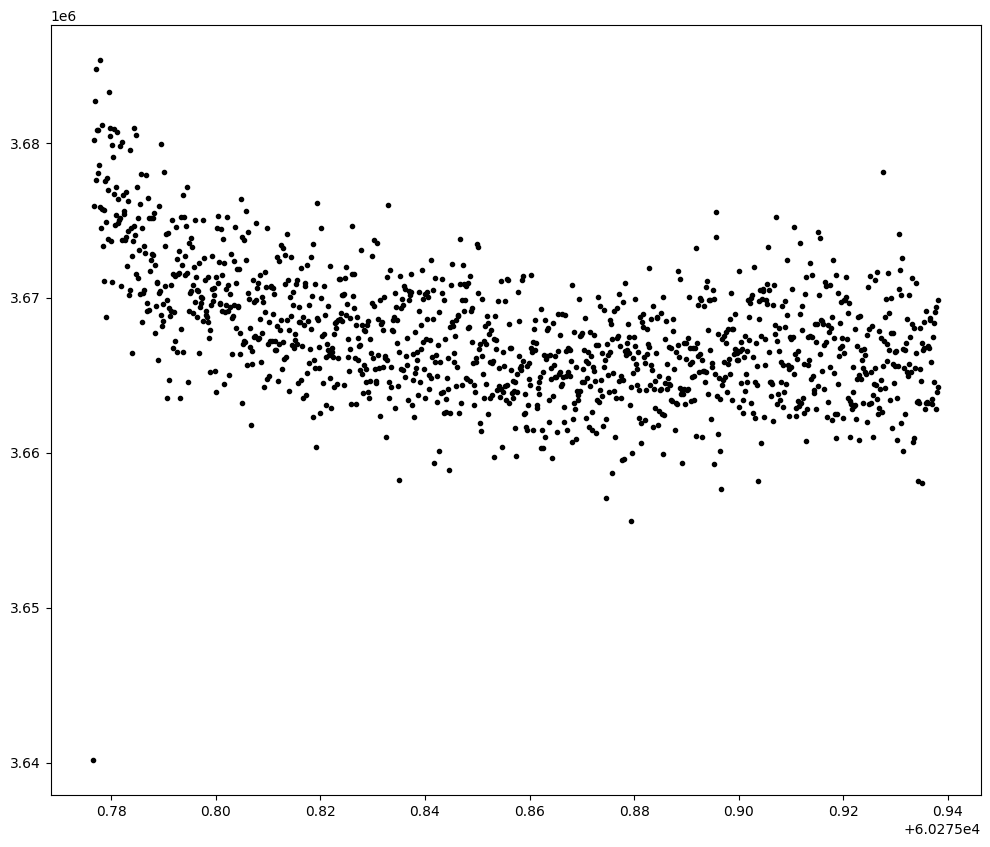

In [8]:
plt.figure(figsize = [12,10])
plt.plot(time, aplev, '.k')

In [10]:
eclipse = Time('2023-11-27 21:00', format = 'iso', scale = 'tdb')
transit = Time('2458389.293900', format = 'jd', scale = 'tdb')
print(eclipse.mjd)

t = Time(time, format = 'mjd')
t.to_value(format='iso')

60275.875


array(['2023-11-27 18:38:06.914', '2023-11-27 18:38:17.995',
       '2023-11-27 18:38:29.077', ..., '2023-11-27 22:30:38.611',
       '2023-11-27 22:30:49.693', '2023-11-27 22:31:00.774'], dtype='<U23')

In [11]:
def binValues(values, binAxisValues, nbin, assumeWhiteNoise=False):
    """Bin values and compute their binned noise.

    Args:
        values (ndarray): An array of values to bin.
        binAxisValues (ndarray): Values of the axis along which binning will occur.
        nbin (int): The number of bins desired.
        assumeWhiteNoise (bool, optional): Divide binned noise by sqrt(nbinned) (True) or not (False, default).

    Returns:
        tuple: binned (ndarray; the binned values),
            binnedErr (ndarray; the binned errors)
    
    """
    
    bins = np.linspace(np.nanmin(binAxisValues), np.nanmax(binAxisValues), nbin)
    digitized = np.digitize(binAxisValues, bins)
    binned = np.array([np.nanmedian(values[digitized == i]) for i in range(1, nbin)])
    binnedErr = np.nanmean(np.array([np.nanstd(values[digitized == i]) for i in range(1, nbin)]))
    if assumeWhiteNoise:
        binnedErr /= np.sqrt(len(values)/nbin)
    return binned, binnedErr

array(['2023-11-27 19:26:30.285', '2023-11-27 19:26:41.367',
       '2023-11-27 19:26:52.449', '2023-11-27 19:27:03.530',
       '2023-11-27 19:27:14.612', '2023-11-27 19:27:25.693',
       '2023-11-27 19:27:36.775', '2023-11-27 19:27:47.856',
       '2023-11-27 19:27:58.938', '2023-11-27 19:28:10.020',
       '2023-11-27 19:28:21.101', '2023-11-27 19:28:32.183',
       '2023-11-27 19:28:43.264', '2023-11-27 19:28:54.346',
       '2023-11-27 19:29:05.427', '2023-11-27 19:29:16.509',
       '2023-11-27 19:29:27.591', '2023-11-27 19:29:38.672',
       '2023-11-27 19:29:49.754', '2023-11-27 19:30:00.835',
       '2023-11-27 19:30:11.917', '2023-11-27 19:30:22.998',
       '2023-11-27 19:30:34.080', '2023-11-27 19:30:45.162',
       '2023-11-27 19:30:56.243', '2023-11-27 19:31:07.325',
       '2023-11-27 19:31:18.406', '2023-11-27 19:31:29.488',
       '2023-11-27 19:31:40.569', '2023-11-27 19:31:51.651',
       '2023-11-27 19:32:02.733', '2023-11-27 19:32:13.814',
       '2023-11-27 19:32

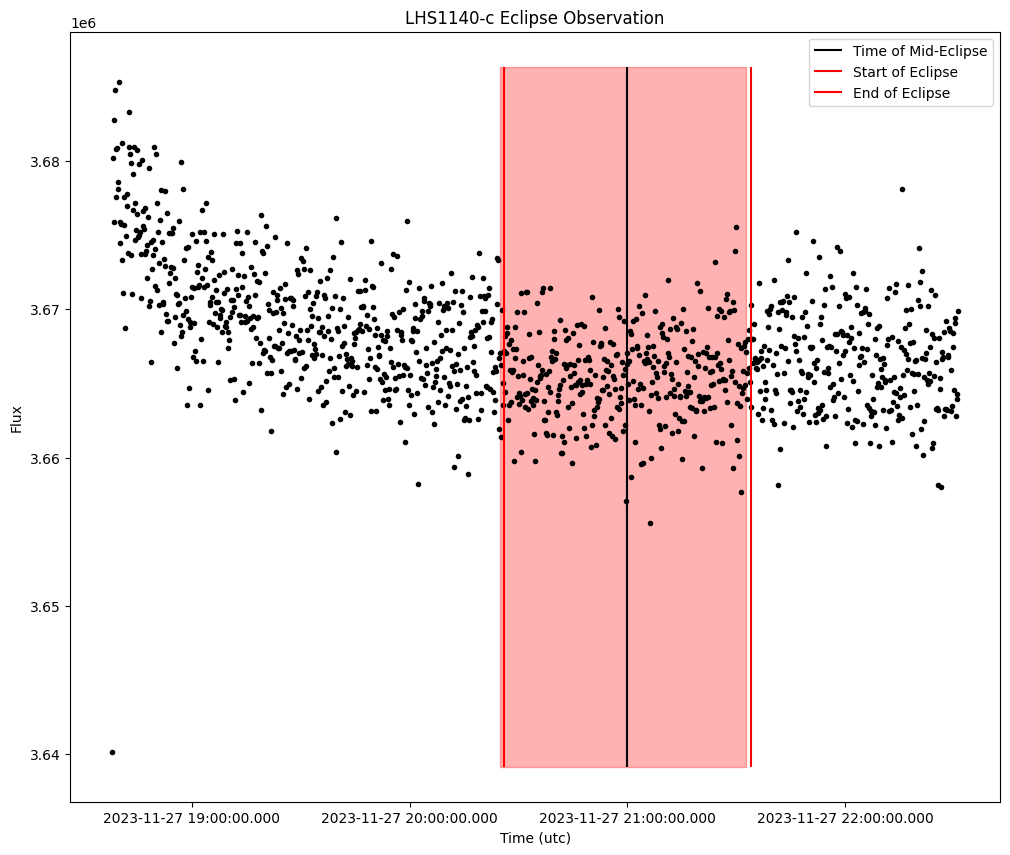

In [12]:
time_support(format = 'iso') 
height = max(aplev) - min(aplev) + 2000
e_dur_days = 1.13 / 24
start = eclipse - e_dur_days / 2  # Center the rectangle at the start of the eclipse

plt.figure(figsize = [12,10])
plt.plot(Time(t, format = 'iso'), aplev, '.k')
#plt.errorbar(aplev, yerr=aperr, c='k', fmt='.')

plt.vlines(eclipse.mjd, min(aplev)-1000, max(aplev)+1000, label = 'Time of Mid-Eclipse', color = 'black')
plt.vlines(eclipse.mjd-(e_dur_days)/2, min(aplev)-1000, max(aplev)+1000, label = 'Start of Eclipse', color = 'red')
plt.vlines(eclipse.mjd+(e_dur_days)/2, min(aplev)-1000, max(aplev)+1000, label = 'End of Eclipse', color = 'red')

rect = patches.Rectangle((start, min(aplev) - 1000), e_dur_days, height, linewidth=1, edgecolor='r', facecolor='red', alpha=0.3)
plt.gca().add_patch(rect)
plt.legend()
plt.ylabel('Flux')
plt.title('LHS1140-c Eclipse Observation')
plt.savefig('Eclipse-ISO.png')

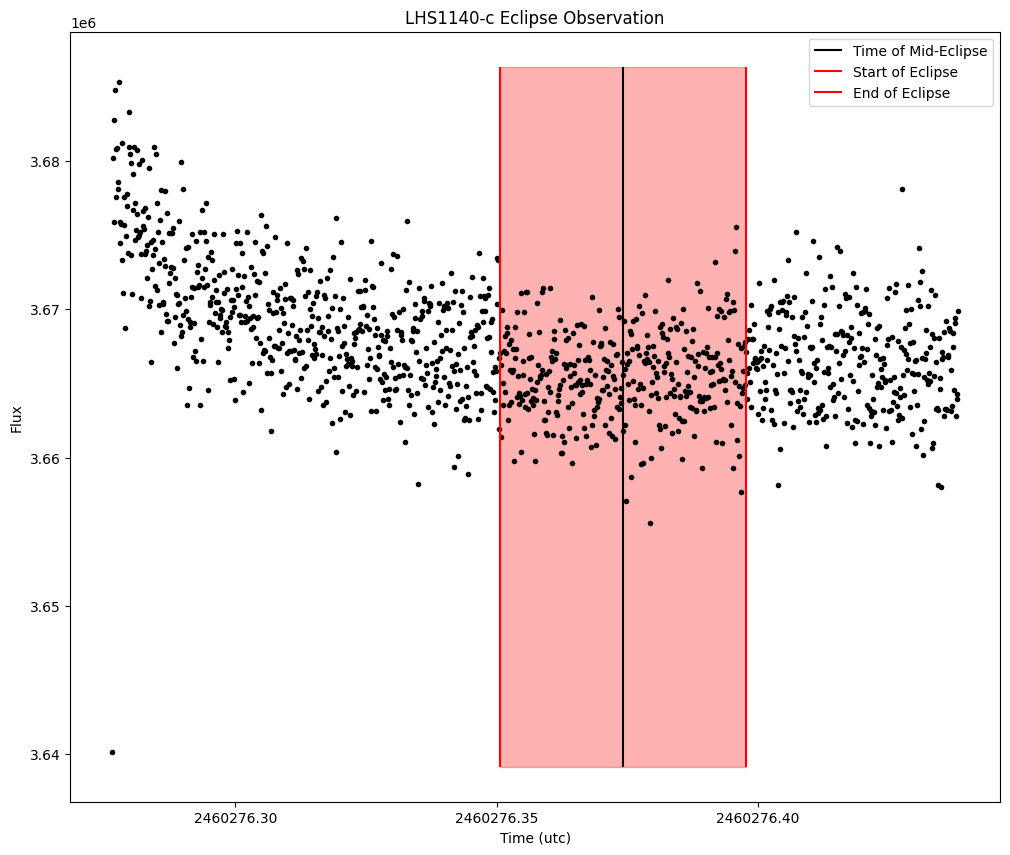

In [13]:
time_support(format = 'jd') 

height = max(aplev) - min(aplev) + 2000
e_dur_days = 1.13 / 24
start = eclipse - e_dur_days / 2  # Center the rectangle at the start of the eclipse

plt.figure(figsize = [12,10])
plt.plot(Time(t, format = 'iso'), aplev, '.k')
#plt.errorbar(aplev, yerr=aperr, c='k', fmt='.')

plt.vlines(eclipse, min(aplev)-1000, max(aplev)+1000, label = 'Time of Mid-Eclipse', color = 'black')
plt.vlines(eclipse-(e_dur_days)/2, min(aplev)-1000, max(aplev)+1000, label = 'Start of Eclipse', color = 'red')
plt.vlines(eclipse+(e_dur_days)/2, min(aplev)-1000, max(aplev)+1000, label = 'End of Eclipse', color = 'red')

rect = patches.Rectangle((start, min(aplev) - 1000), e_dur_days, height, linewidth=1, edgecolor='r', facecolor='red', alpha=0.3)
plt.gca().add_patch(rect)
plt.legend()
plt.ylabel('Flux')
plt.title('LHS1140-c Eclipse Observation')
plt.savefig('Eclipse-JD.png')

In [14]:
t = time[262:]
aplev_short = aplev[262:]
aperr_short = aperr[262:]
nbin = 25
bins_t, binErr_t = binValues(t, t, nbin)
bins_aplev, binErr_aplev = binValues(aplev_short, t, nbin)
bins_t = Time(bins_t, format = 'mjd')
bins_t.to_value(format='iso')

t = Time(t, format = 'mjd')
t.to_value(format='iso')

array(['2023-11-27 19:26:30.285', '2023-11-27 19:26:41.367',
       '2023-11-27 19:26:52.449', '2023-11-27 19:27:03.530',
       '2023-11-27 19:27:14.612', '2023-11-27 19:27:25.693',
       '2023-11-27 19:27:36.775', '2023-11-27 19:27:47.856',
       '2023-11-27 19:27:58.938', '2023-11-27 19:28:10.020',
       '2023-11-27 19:28:21.101', '2023-11-27 19:28:32.183',
       '2023-11-27 19:28:43.264', '2023-11-27 19:28:54.346',
       '2023-11-27 19:29:05.427', '2023-11-27 19:29:16.509',
       '2023-11-27 19:29:27.591', '2023-11-27 19:29:38.672',
       '2023-11-27 19:29:49.754', '2023-11-27 19:30:00.835',
       '2023-11-27 19:30:11.917', '2023-11-27 19:30:22.998',
       '2023-11-27 19:30:34.080', '2023-11-27 19:30:45.162',
       '2023-11-27 19:30:56.243', '2023-11-27 19:31:07.325',
       '2023-11-27 19:31:18.406', '2023-11-27 19:31:29.488',
       '2023-11-27 19:31:40.569', '2023-11-27 19:31:51.651',
       '2023-11-27 19:32:02.733', '2023-11-27 19:32:13.814',
       '2023-11-27 19:32

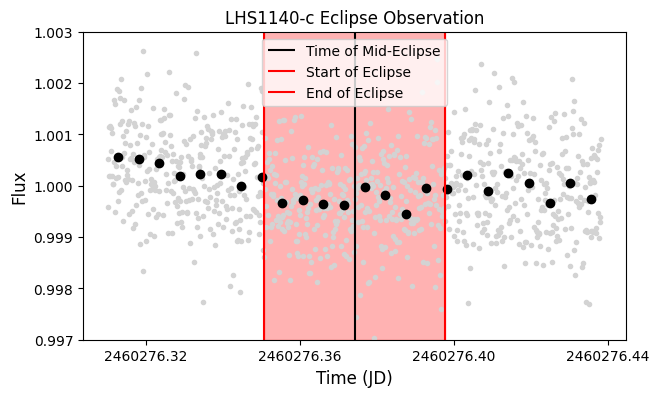

In [15]:
time_support(format = 'jd') 

height = max(bins_aplev) - min(bins_aplev) + 10000
e_dur_days = 1.13 / 24
start = eclipse - e_dur_days / 2  # Center the rectangle at the start of the eclipse

plt.figure(figsize = [7,4])
plt.plot(Time(t, format = 'iso'), aplev_short/np.mean(aplev_short), '.', color = 'lightgrey')
plt.plot(Time(bins_t, format = 'iso'), bins_aplev/np.mean(bins_aplev), 'ok')
#plt.errorbar(t, aplev_short, yerr=aperr_short, c='lightgrey', fmt='.')

plt.vlines(eclipse, 0.995, 1.004, label = 'Time of Mid-Eclipse', color = 'black')
plt.vlines(eclipse-(e_dur_days)/2,  0.995, 1.004, label = 'Start of Eclipse', color = 'red')
plt.vlines(eclipse+(e_dur_days)/2,  0.995, 1.004, label = 'End of Eclipse', color = 'red')

rect = patches.Rectangle((eclipse-e_dur_days/2, 0.997), e_dur_days, height, linewidth=1, edgecolor='r', facecolor='red', alpha=0.3)
plt.gca().add_patch(rect)
plt.legend()
plt.ylim(0.997, 1.003)
plt.ylabel('Flux', fontsize=12)
plt.xlabel('Time (JD)', fontsize=12)
plt.title('LHS1140-c Eclipse Observation')
plt.savefig('Eclipse-JD_binned_n150.png')

/var/folders/19/ynl_hkyx385cs4g05ztfqxfr0000gp/T/ipykernel_97025/3865027492.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(Time(bins_t, format = 'mjd'),norm_flux/linear_slope(t_arr, a, b), 'ok', markersize=8, label='Binned Data', color = 'black', zorder=3)


<Figure size 700x400 with 0 Axes>

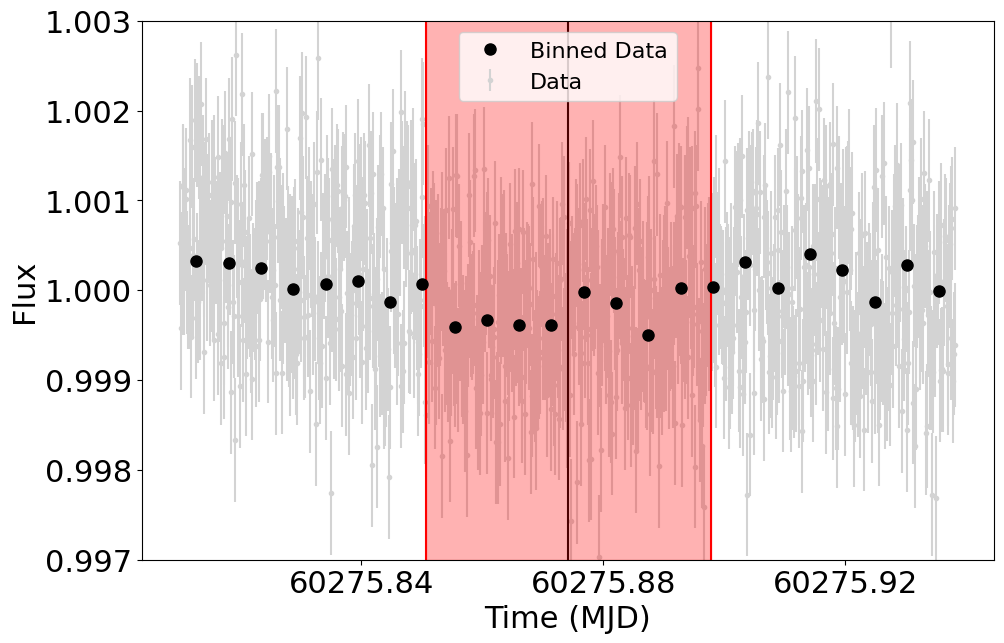

In [91]:
time_support(format = 'mjd') 

t.to_value(format='mjd')
bins_t.to_value(format='mjd')
plt.figure(figsize = [7,4])
times_mjd = t.mjd
eclipse.to_value(format='mjd')
transit.to_value(format='mjd')
norm_flux = np.array(bins_aplev/np.mean(bins_aplev))

plt.figure(figsize = [11,7])

plt.errorbar(times_mjd, aplev_short/np.mean(aplev_short), yerr=aperr_short/np.mean(aplev_short), c='lightgrey', fmt='.', zorder=1, label='Data')
plt.plot(Time(bins_t, format = 'mjd'),norm_flux/linear_slope(t_arr, a, b), 'ok', markersize=8, label='Binned Data', color = 'black', zorder=3)
#plt.plot(t_arr, flux, label = 'Eclipse fit')

plt.vlines(eclipse, 0.995, 1.004, color = 'black', zorder=2)
plt.vlines(eclipse-(e_dur_days)/2,  0.995, 1.004, color = 'red', zorder=2)
plt.vlines(eclipse+(e_dur_days)/2,  0.995, 1.004, color = 'red', zorder=2)

rect = patches.Rectangle((eclipse-e_dur_days/2, 0.997), e_dur_days, height, linewidth=1, edgecolor='r', facecolor='red', alpha=0.3, zorder=2)
plt.gca().add_patch(rect)

plt.legend(prop={'size': 16})
plt.ylim(0.997, 1.003)
plt.ylabel('Flux', fontsize=22)
plt.xlabel('Time (MJD)', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.title('LHS1140-c Eclipse Observation', fontsize=22)
plt.savefig('Eclipse-JD_binned_n25_err_big2.png')
plt.show()

In [42]:
def linear_slope(time, m, b):
    return m*time + b

a, b = np.polyfit(t_arr, bins_aplev/np.mean(bins_aplev), 1)

In [34]:
times = Time(bins_t, format = 'mjd')
print(times.value)

[60275.81270206 60275.81808893 60275.82341168 60275.82873442
 60275.8341213  60275.83944404 60275.84476679 60275.85008953
 60275.85541228 60275.86079915 60275.8661219  60275.87144464
 60275.87683152 60275.88215426 60275.88747701 60275.89279975
 60275.8981225  60275.90350937 60275.90883212 60275.91415486
 60275.91954174 60275.92486448 60275.93018723 60275.93550997]


/var/folders/19/ynl_hkyx385cs4g05ztfqxfr0000gp/T/ipykernel_97025/756812625.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t_arr, norm_flux/linear_slope(t_arr, a, b), 'ok', markersize=4, label='Binned Data', color = 'red')
/var/folders/19/ynl_hkyx385cs4g05ztfqxfr0000gp/T/ipykernel_97025/756812625.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t_arr, norm_flux, 'ok', markersize=4, label='Binned Data', color = 'black')


(0.997, 1.003)

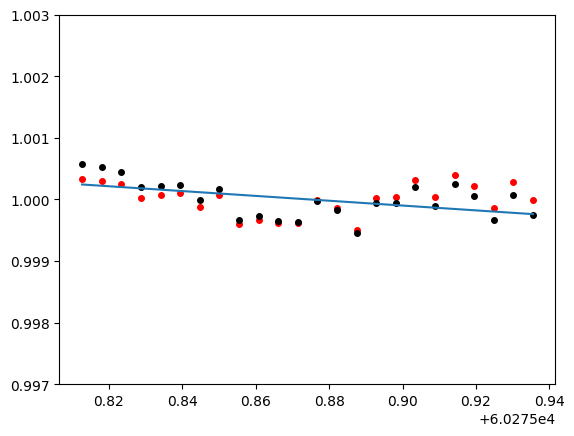

In [53]:
t_arr = np.array(times.value)
plt.plot(t_arr, norm_flux/linear_slope(t_arr, a, b), 'ok', markersize=4, label='Binned Data', color = 'red')
plt.plot(t_arr, linear_slope(t_arr, a, b))
plt.ylim(0.997, 1.003)


/var/folders/19/ynl_hkyx385cs4g05ztfqxfr0000gp/T/ipykernel_97025/3722842900.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t_arr, norm_flux/linear_slope(t_arr, a, b), 'ok', markersize=4, label='Binned Data', color = 'red')


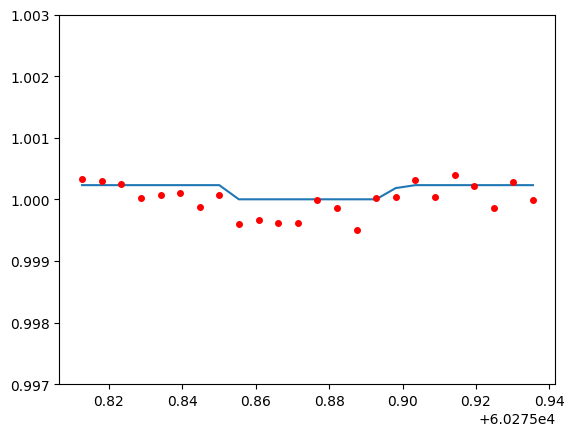

In [77]:
params = batman.TransitParams()       #object to store transit parameters
params.t0 = transit.value                     #time of inferior conjunction
params.per = 3.777940                 #orbital period
params.rp = 0.05486                   #planet radius (in units of stellar radii)
params.a = 26.57                        #semi-major axis (in units of stellar radii)
params.inc = 89.8                    #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]
params.fp = 0.000230                  #planet to star flux ratio
params.t_secondary = eclipse.to_value(format='mjd')

#t = np.linspace(60275.81270206, 60275.93550997135, 24)  #times at which to calculate light curve

m = batman.TransitModel(params, t_arr, transittype="secondary")    #initializes model
#flux = m.light_curve(params) 
#m = batman.TransitModel(params, t, transittype="secondary")
flux = m.light_curve(params)
plt.plot(t_arr, flux)
plt.plot(t_arr, norm_flux/linear_slope(t_arr, a, b), 'ok', markersize=4, label='Binned Data', color = 'red')
plt.ylim(0.997, 1.003)
plt.savefig('Eclipse-JD_25_fitted.png')


In [74]:
print(eclipse.to_value(format='mjd'))
type(eclipse.to_value(format='mjd'))

60275.875


numpy.float64